In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import silhouette_score
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
from itertools import permutations
from itertools import product
from sklearn.metrics import confusion_matrix

c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
campo3 = (6,0)
k3 = 4

campo4 = (2,0)
k4 = 2

campo6 = (6,0)
k6 = 2

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)

with open('./pickles/kmeans_total_3_c_ndre'+str(k3)+'.pickle', 'rb') as handle:
    kmeans_total3 = pickle.load(handle)

with open('./pickles/kmeans_total_3_c_ndre'+str(k3)+'.pickle', 'rb') as handle:
    kmeans_total3_master = pickle.load(handle)

with open('./pickles/kmeans_total_4_c_ndre'+str(k4)+'.pickle', 'rb') as handle:
    kmeans_total4 = pickle.load(handle)

with open('./pickles/kmeans_total_4_c_ndre'+str(k4)+'.pickle', 'rb') as handle:
    kmeans_total4_master = pickle.load(handle)

with open('./pickles/kmeans_total_6_c_ndre'+str(k6)+'.pickle', 'rb') as handle:
    kmeans_total6 = pickle.load(handle)

with open('./pickles/kmeans_total_6_c_ndre'+str(k6)+'.pickle', 'rb') as handle:
    kmeans_total6_master = pickle.load(handle)

In [3]:

newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]
newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]
newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]

In [4]:
num_classi = 6
num_cluster = k6 
campo = 6
campoCoord = campo6
kmeans_select = kmeans_total6
newResa = newResa6

In [5]:
def split_resa(k,resa):
    percentile_value = 1/k
    label = np.ndarray([resa.shape[0]],dtype=int)
    label[:] = int(-1)

    for i in range(0,k):
        label[(resa <= np.quantile(resa,q=(percentile_value*(i+1)))) & (resa >= np.quantile(resa,q=(percentile_value*i)))] = i

    return label


In [6]:
def removeTexts(xlim=np.Inf,ylim=np.Inf):
    axis = plt.gca()
    for text in axis.texts:
        if text.get_position()[0] > xlim or text.get_position()[1] > ylim: #check if x is more than 3
            text.remove()


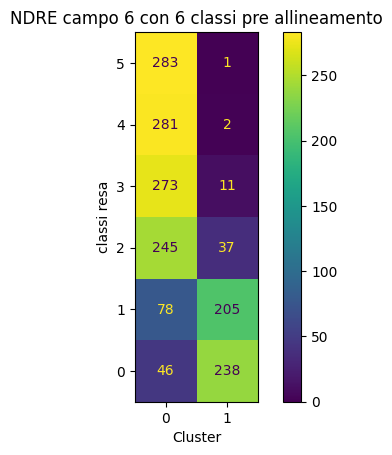

In [7]:
label = split_resa(num_classi,newResa)

ConfusionMatrixDisplay.from_predictions(label,kmeans_select[campoCoord])
xdiplsay = num_cluster-0.5
ydislpay = num_classi-0.5
removeTexts(xlim=xdiplsay,ylim=ydislpay)
plt.title('NDRE campo '+str(campo)+' con '+str(num_classi)+' classi pre allineamento')
plt.xlabel('Cluster')
plt.ylabel('classi resa')
plt.ylim([-0.5,ydislpay])
plt.xlim([-0.5,xdiplsay])
plt.show()

In [8]:
print(list(product(np.unique(label),repeat=len(np.unique(kmeans_select[campoCoord])))))
print(np.unique(label))
print(len(np.unique(kmeans_select[campoCoord])))

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
[0 1 2 3 4 5]
2


In [9]:
def best_cluster(matrice,cluster):
    a = np.arange(matrice.shape[0])
    permutation = list(product(np.unique(label),repeat=len(np.unique(cluster))))
    obiettivo = {'max': 0,
                'perm':[]}

    for perm in permutation:
        somma = 0
        for elem,index in zip(perm,range(matrice.shape[0])):
            somma += matrice[index,elem]
        if(somma > obiettivo['max']):
            obiettivo['max'] = somma
            obiettivo['perm'] = perm

    test_map = {}
    for pippo,pluto in zip(obiettivo['perm'],range(matrice.shape[0])):
        test_map[pluto] = pippo
    return test_map


In [10]:
cluster_class_mapping = {}
matrice_elementi = np.ndarray((len(np.unique(kmeans_select[campoCoord])),num_classi))

for kmean in range(0,len(np.unique(kmeans_select[campoCoord]))):

    cluster_classes = label[kmeans_select[campoCoord] == kmean]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    print(kmean,unique_classes,class_counts)
    matrice_elementi[kmean,:] = class_counts
    
cluster_class_mapping = best_cluster(matrice_elementi,kmeans_select[campoCoord])

0 [0 1 2 3 4 5] [ 46  78 245 273 281 283]
1 [0 1 2 3 4 5] [238 205  37  11   2   1]


In [11]:
print(np.unique(kmeans_select[campoCoord],return_counts=True))
print(cluster_class_mapping)

(array([0, 1], dtype=int64), array([1206,  494], dtype=int64))
{0: 5, 1: 0}


In [12]:
difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])
for i in range(len(np.unique(kmeans_select[campoCoord]))):
    if(i != cluster_class_mapping[i]):
        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)

In [13]:
print(difference)

  num_cluster num_class
0           0         5
1           1         0


In [14]:
indici = []

for a in difference['num_cluster']:
    indici.append([
    index for index in range(len(kmeans_select[campoCoord]))
    if kmeans_select[campoCoord][index] == a
])
for ind,true_value in zip(indici,difference['num_class']):
    kmeans_select[campoCoord][ind] = true_value

In [15]:
cluster_class_mapping_test = {}
matrice_elementi = np.ndarray((len(np.unique(kmeans_select[campoCoord])),num_classi))

for kmean,position in zip(np.unique(kmeans_select[campoCoord]),range(len(np.unique(kmeans_select[campoCoord])))):

    cluster_classes = label[kmeans_select[campoCoord] == kmean]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    print(len(class_counts))
    matrice_elementi[position,:] = class_counts
    
cluster_class_mapping_test = best_cluster(matrice_elementi,kmeans_select[campoCoord])

6
6


In [16]:
print(cluster_class_mapping_test)

{0: 0, 1: 5}


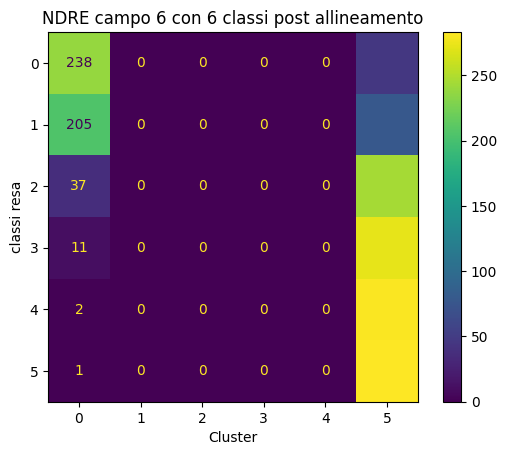

In [17]:
ConfusionMatrixDisplay.from_predictions(label,kmeans_select[campoCoord])

removeTexts(xlim=4)
plt.title('NDRE campo '+str(campo)+' con '+str(num_classi)+' classi post allineamento')
plt.xlabel('Cluster')
plt.ylabel('classi resa')
plt.show()

In [18]:
accuracy = str(accuracy_score(label,kmeans_select[campoCoord]))
precision = str(precision_score(label,kmeans_select[campoCoord],average='macro'))
recall = str(recall_score(label,kmeans_select[campoCoord],average='macro'))

print("accuratezza " + accuracy)
print("precision " + precision)
print("recall " + recall)


accuratezza 0.3064705882352941
precision 0.11940690161428574
recall 0.3057511737089202


c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Nuova matrice di confusione
confusion = confusion_matrix(label,kmeans_select[campoCoord])
#new_confusion = np.concatenate((confusion[:,0:2],confusion[:,3:5]),axis=1)

print(confusion)
selected = []
if num_classi > num_cluster: #rimuove la colonna nulla

    moreRow = 0
    new_confusion = np.zeros((confusion.shape[1],1),dtype=np.int16)

    for i in range(confusion.shape[1]):
        if np.sum(confusion[:,i]) != 0:
            selected.append(str(i)) 
            new_confusion = np.concatenate((new_confusion,confusion[:,i].reshape(confusion.shape[1],1)),axis = 1)

    new_confusion = new_confusion[:,1:]
    
    print(new_confusion)
    print(selected)



[[238   0   0   0   0  46]
 [205   0   0   0   0  78]
 [ 37   0   0   0   0 245]
 [ 11   0   0   0   0 273]
 [  2   0   0   0   0 281]
 [  1   0   0   0   0 283]]
[[238  46]
 [205  78]
 [ 37 245]
 [ 11 273]
 [  2 281]
 [  1 283]]
['0', '5']


In [20]:
print(['']+list([str(x) for x in range(0,new_confusion.shape[1])]))

['', '0', '1']


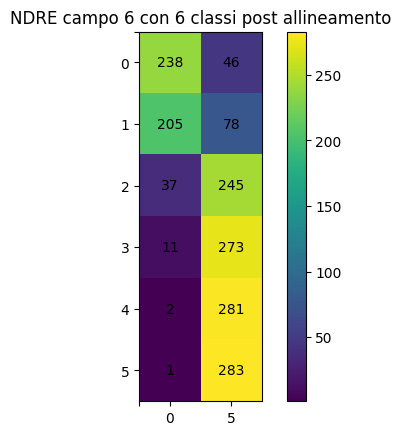

In [21]:
if moreRow != -1: 
    fig, ax = plt.subplots()
    plt.rc('font', size=10)
    image = ax.imshow(new_confusion[:,:],)

    for i in range(0,new_confusion.shape[0]):
        for j in range(0,new_confusion.shape[1]):
            c = np.round(new_confusion[i,j],decimals=3)
            ax.text(j, i, str(c), va='center', ha='center')

    plt.colorbar(image)
    
    ax.set_xticks([-0.5]+list(range(0,new_confusion.shape[1])))
    ax.set_xticklabels(['']+list([str(x) for x in range(0,new_confusion.shape[1])]))

    ax.set_yticks([-0.5]+list(range(0,new_confusion.shape[0])))
    ax.set_yticklabels(['']+list([str(x) for x in range(0,new_confusion.shape[0])]))
    
    if moreRow == 0:
        ax.set_xticklabels(['']+selected)
    elif moreRow == 1:
        ax.set_yticklabels(['']+selected)
    plt.title('NDRE campo '+str(campo)+' con '+str(num_classi)+' classi post allineamento')
    plt.show()